# Import and Load Data

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import cv2
from PIL import Image,ImageStat
import math
from scipy import ndimage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATADIR = "/content/drive/MyDrive/EDTS/KTP Classification /dataset_ktp"
CATEGORIES = ['fotocopy', 'real']

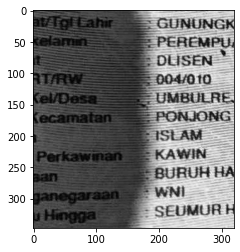

In [ ]:
for category in CATEGORIES:
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    global img_array
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = 'gray')
    plt.show()
    break
  break

In [ ]:
len(img_array)

347

# 1. Luminance

Using OpenCV method and PIL 

In [ ]:
luminance_data = []

In [ ]:
def find_luminance():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = Image.open(os.path.join(path,img))
      stat = ImageStat.Stat(img_array)
      r,g,b = stat.rms
      lum = math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2))
      luminance_data.append([lum, class_num])

find_luminance()

In [ ]:
import pandas as pd

In [ ]:
lum_df = pd.DataFrame(luminance_data, columns = ['Luminance', 'Photo Label'])

In [ ]:
lum_df['Index'] = lum_df.index

In [ ]:
lum_df.head()

,Luminance,Photo Label,Index
0,108.015872,0,0
1,152.420934,0,1
2,175.078256,0,2
3,124.114468,0,3
4,105.774837,0,4


# 2. RGB Mean

Using OpenCV method 

In [ ]:
b_avg = []
g_avg = []
r_avg = []

In [ ]:
def find_rgb_avg():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and splits the RGB channels
      img_array = cv2.imread(os.path.join(path,img))
      b_arr, g_arr, r_arr = cv2.split(img_array)
      # Get the average of the rows of B values in a picture
      b_mean_row = np.average(b_arr, axis=0)
      g_mean_row = np.average(g_arr, axis=0)
      r_mean_row = np.average(r_arr, axis=0)
      # Average again the total B values in a single picture (X and Y)
      b = np.average(b_mean_row, axis = 0)
      g = np.average(g_mean_row, axis = 0)
      r = np.average(r_mean_row, axis = 0)
      # Append values to the list 
      b_avg.append([b])
      g_avg.append([g])
      r_avg.append([r])
      
find_rgb_avg()   

In [ ]:
avg_b_df = pd.DataFrame(b_avg, columns = ['B Mean', 'Photo Label'])
avg_g_df = pd.DataFrame(g_avg, columns = ['G Mean', 'Photo Label'])
avg_r_df = pd.DataFrame(r_avg, columns = ['R Mean', 'Photo Label'])


In [ ]:
avg_b_df.head()
avg_g_df.head()
avg_r_df.head()

,R Mean,Photo Label
0,94.084645,0
1,147.113395,0
2,185.539143,0
3,114.699943,0
4,100.529764,0


In [ ]:
avg_b_df['Index'] = avg_b_df.index
avg_g_df['Index'] = avg_g_df.index
avg_r_df['Index'] = avg_r_df.index

In [ ]:
KTP_df = pd.read_csv('KTP Dataframe.csv')
KTP_df.head()

,Index,Photo Label,Luminance,RGB Mean,RGB Variance,Gray Variance,Blur,Sharpness,Resolution,Saturation,Colorfulness
0,0,0,108.015872,[89.76004143 89.82606268 94.08464517],3500.678907,11394.115528,979.797994,10.668554,111040,92.011807,6.582818
1,1,0,152.420934,[143.91177469 145.29694444 147.11339506],2020.556052,7847.201504,3587.070781,24.669289,64800,145.665772,3.851335
2,2,0,175.078256,[156.87330612 169.69195918 185.53914286],931.215845,13014.157600,551.180912,3.229098,49000,171.468143,11.803814
3,3,0,124.114468,[109.35392574 110.43952664 114.69994331],2963.024797,13895.018146,196.655125,1.755649,70560,112.047222,6.311370
4,4,0,105.774837,[100.98127441 101.12473569 100.52976382],992.422931,12009.326236,1187.462301,11.775583,55806,100.832581,1.652960


In [ ]:
KTP_df = KTP_df.drop(columns = ['RGB Mean', 'RGB Variance'])
KTP_df.head()

,Index,Photo Label,Luminance,Gray Variance,Blur,Sharpness,Resolution,Saturation,Colorfulness
0,0,0,108.015872,11394.115528,979.797994,10.668554,111040,92.011807,6.582818
1,1,0,152.420934,7847.201504,3587.070781,24.669289,64800,145.665772,3.851335
2,2,0,175.078256,13014.157600,551.180912,3.229098,49000,171.468143,11.803814
3,3,0,124.114468,13895.018146,196.655125,1.755649,70560,112.047222,6.311370
4,4,0,105.774837,12009.326236,1187.462301,11.775583,55806,100.832581,1.652960


In [ ]:
KTP_df = KTP_df.merge(avg_b_df, on = ['Photo Label', 'Index'], how = 'left')
KTP_df = KTP_df.merge(avg_g_df, on = ['Photo Label', 'Index'], how = 'left')
KTP_df = KTP_df.merge(avg_r_df, on = ['Photo Label', 'Index'], how = 'left')
KTP_df.head()

,Index,Photo Label,Luminance,Gray Variance,Blur,Sharpness,Resolution,Saturation,Colorfulness,B Mean,G Mean,R Mean
0,0,0,108.015872,11394.115528,979.797994,10.668554,111040,92.011807,6.582818,89.760041,89.826063,94.084645
1,1,0,152.420934,7847.201504,3587.070781,24.669289,64800,145.665772,3.851335,143.911775,145.296944,147.113395
2,2,0,175.078256,13014.157600,551.180912,3.229098,49000,171.468143,11.803814,156.873306,169.691959,185.539143
3,3,0,124.114468,13895.018146,196.655125,1.755649,70560,112.047222,6.311370,109.353926,110.439527,114.699943
4,4,0,105.774837,12009.326236,1187.462301,11.775583,55806,100.832581,1.652960,100.981274,101.124736,100.529764


# 3. RGB Variance

Using scipy Method

In [ ]:
b_var = []
g_var = []
r_var = []

In [ ]:
def find_rgb_var():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img))
      b_arr, g_arr, r_arr = cv2.split(img_array)
      
      b  = ndimage.variance(b_arr)
      g = ndimage.variance(g_arr)
      r = ndimage.variance(r_arr)
      
      b_var.append([b, class_num])
      g_var.append([g, class_num])
      r_var.append([r, class_num])
      
find_rgb_var()

In [ ]:
var_b_df = pd.DataFrame(b_var, columns = ['B Variance', 'Photo Label'])
var_g_df = pd.DataFrame(g_var, columns = ['G Variance', 'Photo Label'])
var_r_df = pd.DataFrame(r_var, columns = ['R Variance', 'Photo Label'])

In [ ]:
var_b_df['Index'] = var_b_df.index
var_g_df['Index'] = var_g_df.index
var_r_df['Index'] = var_r_df.index

In [ ]:
KTP_df = KTP_df.merge(var_b_df, on = ['Index', 'Photo Label'], how = 'left')
KTP_df = KTP_df.merge(var_g_df, on = ['Index', 'Photo Label'], how = 'left')
KTP_df = KTP_df.merge(var_r_df, on = ['Index', 'Photo Label'], how = 'left')
KTP_df.head()

,Index,Photo Label,Luminance,Gray Variance,Blur,Sharpness,Resolution,Saturation,Colorfulness,B Mean,G Mean,R Mean,B Variance,G Variance,R Variance
0,0,0,108.015872,11394.115528,979.797994,10.668554,111040,92.011807,6.582818,89.760041,89.826063,94.084645,3891.504497,3457.591306,3140.660225
1,1,0,152.420934,7847.201504,3587.070781,24.669289,64800,145.665772,3.851335,143.911775,145.296944,147.113395,2065.324670,2030.408707,1960.778592
2,2,0,175.078256,13014.157600,551.180912,3.229098,49000,171.468143,11.803814,156.873306,169.691959,185.539143,819.591336,789.514703,772.147733
3,3,0,124.114468,13895.018146,196.655125,1.755649,70560,112.047222,6.311370,109.353926,110.439527,114.699943,3111.011797,3094.870946,2667.221786
4,4,0,105.774837,12009.326236,1187.462301,11.775583,55806,100.832581,1.652960,100.981274,101.124736,100.529764,994.046831,996.568841,986.460310


# 4. Gray Variance

Using OpenCV and Scipy 

In [ ]:
var_gray = []

In [ ]:
def find_gray_var():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      laplacian = ndimage.laplace(img_array).var()
      var_gray.append([laplacian, class_num])

find_gray_var()

In [ ]:
var_gray_df = pd.DataFrame(var_gray, columns = ['Gray Variance', 'Photo Label'])

In [ ]:
var_gray_df['Index'] = var_gray_df.index

In [ ]:
df_join = df_join.merge(var_gray_df, on = ['Index', 'Photo Label'], how = 'left')
df_join.head()

,Index,Photo Label,Luminance,RGB Mean,RGB Variance,Gray Variance
0,0,0,108.015872,"[89.76004142651301, 89.82606268011529, 94.0846...",3500.678907,11394.115528
1,1,0,152.420934,"[143.91177469135798, 145.29694444444445, 147.1...",2020.556052,7847.201504
2,2,0,175.078256,"[156.87330612244904, 169.6919591836735, 185.53...",931.215845,13014.157600
3,3,0,124.114468,"[109.35392573696143, 110.43952664399087, 114.6...",2963.024797,13895.018146
4,4,0,105.774837,"[100.9812744149374, 101.12473569150264, 100.52...",992.422931,12009.326236


# 5. Blur Value

Using OpenCV Method 

In [ ]:
blur_val = []

In [ ]:
def find_blur():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img))
      blur = cv2.Laplacian(img_array, cv2.CV_64F).var()
      blur_val.append([blur, class_num])

find_blur()

In [ ]:
blur_df = pd.DataFrame(blur_val, columns = ['Blur', 'Photo Label'])

In [ ]:
blur_df['Index'] = blur_df.index

In [ ]:
df_join = df_join.merge(blur_df, on = ['Index', 'Photo Label'], how = 'left')
df_join.head()

,Index,Photo Label,Luminance,RGB Mean,RGB Variance,Gray Variance,Blur
0,0,0,108.015872,"[89.76004142651301, 89.82606268011529, 94.0846...",3500.678907,11394.115528,979.797994
1,1,0,152.420934,"[143.91177469135798, 145.29694444444445, 147.1...",2020.556052,7847.201504,3587.070781
2,2,0,175.078256,"[156.87330612244904, 169.6919591836735, 185.53...",931.215845,13014.157600,551.180912
3,3,0,124.114468,"[109.35392573696143, 110.43952664399087, 114.6...",2963.024797,13895.018146,196.655125
4,4,0,105.774837,"[100.9812744149374, 101.12473569150264, 100.52...",992.422931,12009.326236,1187.462301


# 6. Sharpness

Using OpenCV method 

In [ ]:
sharpness = []

In [ ]:
def find_sharpness():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img))
      img_HLS_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2HLS)
      L = img_HLS_array[:, :, 1]
      u = np.mean(L)
      LP = cv2.Laplacian(L, cv2.CV_64F).var()
      sharp = np.sum(LP / u)
      sharpness.append([sharp, class_num])

find_sharpness()

In [ ]:
sharpness_df = pd.DataFrame(sharpness, columns = ['Sharpness', 'Photo Label'])

In [ ]:
sharpness_df['Index'] = sharpness_df.index

In [ ]:
df_join = df_join.merge(sharpness_df, on = ['Index', 'Photo Label'], how = 'left')
df_join.head()

,Index,Photo Label,Luminance,RGB Mean,RGB Variance,Gray Variance,Blur,Sharpness
0,0,0,108.015872,"[89.76004142651301, 89.82606268011529, 94.0846...",3500.678907,11394.115528,979.797994,10.668554
1,1,0,152.420934,"[143.91177469135798, 145.29694444444445, 147.1...",2020.556052,7847.201504,3587.070781,24.669289
2,2,0,175.078256,"[156.87330612244904, 169.6919591836735, 185.53...",931.215845,13014.157600,551.180912,3.229098
3,3,0,124.114468,"[109.35392573696143, 110.43952664399087, 114.6...",2963.024797,13895.018146,196.655125,1.755649
4,4,0,105.774837,"[100.9812744149374, 101.12473569150264, 100.52...",992.422931,12009.326236,1187.462301,11.775583


# 7. Distinct Pixel Rate

Using OpenCV Method 

In [ ]:
resolution = []

In [ ]:
def find_resolution():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img))
      height, width = img_array.shape[:2]
      distinct_pix = height * width

      resolution.append([distinct_pix, class_num])

find_resolution()

In [ ]:
res_df = pd.DataFrame(resolution, columns = ['Resolution', 'Photo Label'])

In [ ]:
res_df['Index'] = res_df.index

In [ ]:
df_join = df_join.merge(res_df, on = ['Index', 'Photo Label'], how = 'left')
df_join.head()

,Index,Photo Label,Luminance,RGB Mean,RGB Variance,Gray Variance,Blur,Sharpness,Resolution
0,0,0,108.015872,"[89.76004142651301, 89.82606268011529, 94.0846...",3500.678907,11394.115528,979.797994,10.668554,111040
1,1,0,152.420934,"[143.91177469135798, 145.29694444444445, 147.1...",2020.556052,7847.201504,3587.070781,24.669289,64800
2,2,0,175.078256,"[156.87330612244904, 169.6919591836735, 185.53...",931.215845,13014.157600,551.180912,3.229098,49000
3,3,0,124.114468,"[109.35392573696143, 110.43952664399087, 114.6...",2963.024797,13895.018146,196.655125,1.755649,70560
4,4,0,105.774837,"[100.9812744149374, 101.12473569150264, 100.52...",992.422931,12009.326236,1187.462301,11.775583,55806


# 8. Saturation

Using OpenCV Method 

In [ ]:
saturation = []

In [ ]:
def find_saturation():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img))
      img_HLS_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2HLS)
      sat = img_HLS_array[:, :, 1].mean()
      
      saturation.append([sat, class_num])

find_saturation()

In [ ]:
sat_df = pd.DataFrame(saturation, columns = ['Saturation', 'Photo Label'])

In [ ]:
sat_df['Index'] = sat_df.index

In [ ]:
df_join = df_join.merge(sat_df, on = ['Index', 'Photo Label'], how = 'left')
df_join.head()

,Index,Photo Label,Luminance,RGB Mean,RGB Variance,Gray Variance,Blur,Sharpness,Resolution,Saturation
0,0,0,108.015872,"[89.76004142651301, 89.82606268011529, 94.0846...",3500.678907,11394.115528,979.797994,10.668554,111040,92.011807
1,1,0,152.420934,"[143.91177469135798, 145.29694444444445, 147.1...",2020.556052,7847.201504,3587.070781,24.669289,64800,145.665772
2,2,0,175.078256,"[156.87330612244904, 169.6919591836735, 185.53...",931.215845,13014.157600,551.180912,3.229098,49000,171.468143
3,3,0,124.114468,"[109.35392573696143, 110.43952664399087, 114.6...",2963.024797,13895.018146,196.655125,1.755649,70560,112.047222
4,4,0,105.774837,"[100.9812744149374, 101.12473569150264, 100.52...",992.422931,12009.326236,1187.462301,11.775583,55806,100.832581


# 9. Colorfulness

In [ ]:
colorfulness = []

In [ ]:
def find_colorfulness():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img))
      # split the image into its respective RGB components
      (B, G, R) = cv2.split(img_array.astype("float"))
      # compute rg = R - G
      rg = np.absolute(R - G)
      # compute yb = 0.5 * (R + G) - B
      yb = np.absolute(0.5 * (R + G) - B)
      # compute the mean and standard deviation of both `rg` and `yb`
      (rbMean, rbStd) = (np.mean(rg), np.std(rg))
      (ybMean, ybStd) = (np.mean(yb), np.std(yb))
      # combine the mean and standard deviations
      stdRoot = np.sqrt((rbStd ** 2) + (ybStd ** 2))
      meanRoot = np.sqrt((rbMean ** 2) + (ybMean ** 2))
      # derive the "colorfulness" metric and return it
      colorful = stdRoot + (0.3 * meanRoot)
      
      colorfulness.append([colorful, class_num])

find_colorfulness()

In [ ]:
color_df = pd.DataFrame(colorfulness, columns = ['Colorfulness', 'Photo Label'])

In [ ]:
color_df['Index'] = color_df.index

In [ ]:
df_join = df_join.merge(color_df, on = ['Index', 'Photo Label'], how = 'left')
df_join.head()

,Index,Photo Label,Luminance,RGB Mean,RGB Variance,Gray Variance,Blur,Sharpness,Resolution,Saturation,Colorfulness
0,0,0,108.015872,"[89.76004142651301, 89.82606268011529, 94.0846...",3500.678907,11394.115528,979.797994,10.668554,111040,92.011807,6.582818
1,1,0,152.420934,"[143.91177469135798, 145.29694444444445, 147.1...",2020.556052,7847.201504,3587.070781,24.669289,64800,145.665772,3.851335
2,2,0,175.078256,"[156.87330612244904, 169.6919591836735, 185.53...",931.215845,13014.157600,551.180912,3.229098,49000,171.468143,11.803814
3,3,0,124.114468,"[109.35392573696143, 110.43952664399087, 114.6...",2963.024797,13895.018146,196.655125,1.755649,70560,112.047222,6.311370
4,4,0,105.774837,"[100.9812744149374, 101.12473569150264, 100.52...",992.422931,12009.326236,1187.462301,11.775583,55806,100.832581,1.652960


# Save full dataframe to .csv

In [ ]:
KTP_df.to_csv('KTP Dataframe Final.csv', index = False)